<a href="https://colab.research.google.com/github/aayushrai/HackerEarth_Flower_Challange/blob/master/Flower_classification(transfer_Learning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://he-public-data.s3-ap-southeast-1.amazonaws.com/HE_Challenge_data.zip
!unzip /content/HE_Challenge_data.zip

--2019-11-15 12:33:08--  https://he-public-data.s3-ap-southeast-1.amazonaws.com/HE_Challenge_data.zip
Resolving he-public-data.s3-ap-southeast-1.amazonaws.com (he-public-data.s3-ap-southeast-1.amazonaws.com)... 52.219.32.123
Connecting to he-public-data.s3-ap-southeast-1.amazonaws.com (he-public-data.s3-ap-southeast-1.amazonaws.com)|52.219.32.123|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 948965311 (905M) [application/zip]
Saving to: ‘HE_Challenge_data.zip.1’

HE_Challenge_data.z 100%[===================>] 905.00M  61.8MB/s    in 15s     

2019-11-15 12:33:23 (60.2 MB/s) - ‘HE_Challenge_data.zip.1’ saved [948965311/948965311]

Archive:  /content/HE_Challenge_data.zip
replace data/sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace data/test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace data/test/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [0]:
import numpy as np
import cv2
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import os
import tensorflow as tf
from tensorflow import keras

In [3]:
print(tf.__version__)

2.0.0-alpha0


In [0]:
df = pd.read_csv("/content/data/train.csv")

In [5]:
img_name = df["image_id"].values
Y_ = df["category"].values
Y_ = Y_.reshape(-1,1)
onehot = OneHotEncoder()
Y = onehot.fit_transform(Y_).toarray()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [6]:
 X= []
for i,name in enumerate(img_name):
    img = cv2.imread("/content/data/train/{}.jpg".format(name))
    img = cv2.resize(img,(150,150))
    X.append(img)
    print(name,end= "-")

0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-72-73-74-75-76-77-78-79-80-81-82-83-84-85-86-87-88-89-90-91-92-93-94-95-96-97-98-99-100-101-102-103-104-105-106-107-108-109-110-111-112-113-114-115-116-117-118-119-120-121-122-123-124-125-126-127-128-129-130-131-132-133-134-135-136-137-138-139-140-141-142-143-144-145-146-147-148-149-150-151-152-153-154-155-156-157-158-159-160-161-162-163-164-165-166-167-168-169-170-171-172-173-174-175-176-177-178-179-180-181-182-183-184-185-186-187-188-189-190-191-192-193-194-195-196-197-198-199-200-201-202-203-204-205-206-207-208-209-210-211-212-213-214-215-216-217-218-219-220-221-222-223-224-225-226-227-228-229-230-231-232-233-234-235-236-237-238-239-240-241-242-243-244-245-246-247-248-249-250-251-252-253-254-255-256-257-258-259-260-261-262-263-264-265-266-267-268-269-270-271-272-273-274-275-276-27

In [0]:
X = np.array(X)/255

In [0]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=.25,shuffle=True)


In [0]:
X=0 #Free RAM 

In [0]:
# Create the base model from the pre-trained model MobileNet V2
# base_model = tf.keras.applications.MobileNetV2(input_shape=(150,150,3),include_top=False, weights='imagenet')
#base_model = tf.keras.applications.ResNet50(input_shape=(150,150,3),include_top=False,weights='imagenet')
#base_model = tf.keras.applications.MobileNet(input_shape=(150,150,3),include_top=False, weights='imagenet')
base_model = tf.keras.applications.DenseNet121(input_shape=(150,150,3),include_top=False, weights='imagenet')

In [11]:
print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  427


In [0]:
# Fine tune from this layer onwards
fine_tune_at = 301

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

In [13]:
base_model.summary()

Model: "densenet121"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 156, 156, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 75, 75, 64)   9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalizationV1) (None, 75, 75, 64)   256         conv1/conv[0][0]                 
________________________________________________________________________________________

In [0]:
model = tf.keras.Sequential([
  base_model,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dropout(.1),
  tf.keras.layers.Dense(1024, activation=tf.nn.relu),
  tf.keras.layers.Dropout(.1),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(102, activation=tf.nn.softmax)
])

In [0]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Model)          (None, 4, 4, 1024)        7037504   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_5 (Dense)              (None, 102)              

In [21]:
history = model.fit(x_train,y_train,batch_size=700,epochs=100,validation_data=(x_test,y_test))

Train on 13905 samples, validate on 4635 samples
Epoch 1/100
13905/13905 [==============================] - 42s 3ms/sample - loss: 4.0951 - accuracy: 0.1394 - val_loss: 3.6139 - val_accuracy: 0.2073
Epoch 2/100
13905/13905 [==============================] - 22s 2ms/sample - loss: 2.5797 - accuracy: 0.4868 - val_loss: 2.4312 - val_accuracy: 0.4358
Epoch 3/100
13905/13905 [==============================] - 22s 2ms/sample - loss: 1.3060 - accuracy: 0.7419 - val_loss: 1.6069 - val_accuracy: 0.5955
Epoch 4/100
13905/13905 [==============================] - 22s 2ms/sample - loss: 0.6313 - accuracy: 0.8690 - val_loss: 1.0924 - val_accuracy: 0.7228
Epoch 5/100
13905/13905 [==============================] - 22s 2ms/sample - loss: 0.3344 - accuracy: 0.9330 - val_loss: 0.7584 - val_accuracy: 0.8140
Epoch 6/100
13905/13905 [==============================] - 22s 2ms/sample - loss: 0.1847 - accuracy: 0.9686 - val_loss: 0.5833 - val_accuracy: 0.8576
Epoch 7/100
13905/13905 [==========================

In [0]:
model.save("perfect1.h5")

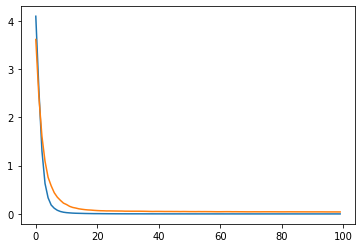

In [23]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

In [0]:
model = tf.keras.models.load_model("perfect1.h5")

51


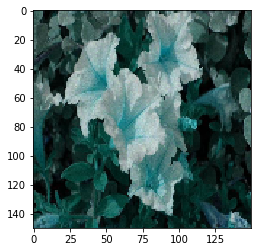

In [34]:
img = cv2.imread("/content/data/train/8.jpg")
img2 = cv2.resize(img,(150,150))/255
img = img2.reshape(1,img2.shape[0],img2.shape[1],img2.shape[2])
print(model.predict_classes(img)[0]+1)
plt.imshow(img2)

In [0]:
#classes
# Alpine sea holly
# Anthurium
# Artichoke
# Azalea
# Ball Moss
# Balloon Flower
# Barbeton Daisy
# Bearded Iris
# Bee Balm
# Bird of paradise
# Bishop of llandaff
# Blackberry Lily
# Black-eyed Susan
# Blanket flower
# Bolero deep blue
# Bougainvillea
# Bromelia
# Buttercup
# Californian Poppy
# Camellia
# Canna Lily
# Canterbury Bells
# Cape Flower
# Carnation
# Cautleya Spicata
# Clematis
# Colt's Foot
# Columbine
# Common Dandelion
# Corn poppy
# Cyclamen
# Daffodil
# Desert-rose
# English Marigold
# Fire Lily
# Foxglove
# Frangipani
# Fritillary
# Garden Phlox
# Gaura
# Gazania
# Geranium
# Giant white arum lily
# Globe Thistle
# Globe-flower
# Grape Hyacinth
# Great Masterwort
# Hard-leaved pocket orchid
# Hibiscus
# Hippeastrum
# Japanese Anemone
# King Protea
# Lenten Rose    
# Lotus
# Love in the mist
# Magnolia
# Mallow
# Marigold
# Mexican Aster
# Mexican Petunia
# Monkshood
# Moon Orchid
# Morning Glory
# Orange Dahlia
# Osteospermum
# Oxeye Daisy
# Passion Flower
# Pelargonium
# Peruvian Lily
# Petunia
# Pincushion flower
# Pink Primrose
# Pink-yellow Dahlia
# Poinsettia
# Primula
# Prince of wales feathers
# Purple Coneflower
# Red Ginger
# Rose
# Ruby-lipped Cattleya
# Siam Tulip
# Silverbush
# Snapdragon
# Spear Thistle
# Spring Crocus
# Stemless Gentian
# Sunflower
# Sweet pea
# Sweet William
# Sword Lily
# Thorn Apple
# Tiger Lily
# Toad Lily
# Tree Mallow
# Tree Poppy
# Trumpet Creeper
# Wallflower
# Water Lily
# Watercress
# Wild Pansy
# Windflower
# Yellow Iris